In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from hmmlearn import hmm

In [2]:
# (1) All factor models take the top 300 liquid stocks and rank them by the factor
# (2) Windsorize top top 10 and bottom 10 stocks (for singular factor models)
# (3) Long/Short 50 stocks each
# Book Value -> Book value per share to identify value stocks as a factor for alpha
# Momentum -> Use 1 month returns as factor for alpha
# AQR -> Multifactor model that creates a synthetic factor that weighs 30% operation margin, 40% Book Value Yield, 
#    and 30% 1 month momentum as a factor for alpha

spy = pd.read_csv('data/SPY_ADV.csv').drop("Unnamed: 0", axis=1).drop(range(2706, 3330))
bookvalue = pd.read_csv('data/BookValue.csv')
momentum = pd.read_csv('data/Momentum.csv')
aqr = pd.read_csv('data/AQR.csv')
inverse_bookvalue = pd.read_csv('data/Inverse_BookValue.csv')

In [3]:
df = momentum.drop(momentum.columns[[2, 3, 4]], axis=1)
df = df.rename(columns={'Return': 'Momentum'})
df['BookValue'] = bookvalue.iloc[:,1]
df['InverseBook'] = inverse_bookvalue.iloc[:,2]
df['AQR'] = aqr.iloc[:,1]
length = df.shape[0]
df['SPY'] = spy.iloc[:,9]

In [4]:
df.head()

,Date,Momentum,BookValue,InverseBook,AQR,SPY
0,2007-01-03,-0.325891,-0.156088,-0.250735,-0.190234,-0.176529
1,2007-01-04,-1.339746,-0.557835,0.182867,-2.273664,0.212211
2,2007-01-05,-0.424333,-0.941898,1.092331,-1.097538,-0.797632
3,2007-01-08,0.484884,-0.031855,-0.389474,0.572755,0.462508
4,2007-01-09,0.075412,-0.309927,0.447538,-0.056759,-0.084988


In [5]:
df.to_csv('data/Factors.csv')

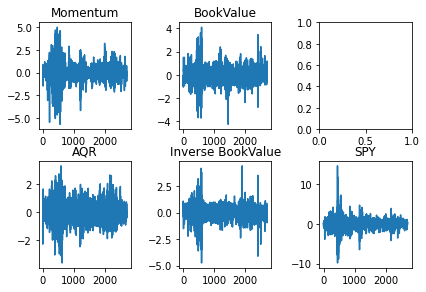

In [6]:
fig, a =  plt.subplots(2,3)
x = np.arange(1,5)
fig.tight_layout()
a[0][0].plot(range(0,length), df.iloc[:,1])
a[0][0].set_title('Momentum')
a[0][1].plot(range(0,length), df.iloc[:,2])
a[0][1].set_title('BookValue')
a[1][0].plot(range(0,length), df.iloc[:,4])
a[1][0].set_title('AQR')
a[1][1].plot(range(0,length), df.iloc[:,3])
a[1][1].set_title('Inverse BookValue')
a[1][2].plot(range(0,length), spy.iloc[:,9])
a[1][2].set_title('SPY')
plt.show()



In [7]:
returns = df.copy()
returns['SPY'] = spy.iloc[:,9]
for i in range(1, 6):
    returns.iloc[0, i] = 100000

for i in range(1, returns.shape[0]):
    for j in range(1, 6):
        returns.iloc[i, j] = returns.iloc[i-1, j] * (100 + returns.iloc[i,j])/100

In [8]:
returns

,Date,Momentum,BookValue,InverseBook,AQR,SPY
0,2007-01-03,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
1,2007-01-04,98660.254117,99442.165201,100182.867329,97726.335982,100212.211226
2,2007-01-05,98241.605788,98505.521767,101277.195716,96653.752781,99412.886730
3,2007-01-08,98717.963150,98474.142819,100882.747847,97207.341817,99872.679489
4,2007-01-09,98792.407941,98168.945348,101334.236951,97152.167899,99787.799384
...,...,...,...,...,...,...
2701,2017-09-25,65183.071220,29528.551366,137176.482833,51146.072118,176084.036079
2702,2017-09-26,64576.053082,29879.748028,135879.220497,51163.310992,176190.146997
2703,2017-09-27,64370.651217,29956.619002,135651.774603,50978.451240,176876.290475
2704,2017-09-28,64460.286516,29885.921253,135494.436681,50948.185552,177088.501701


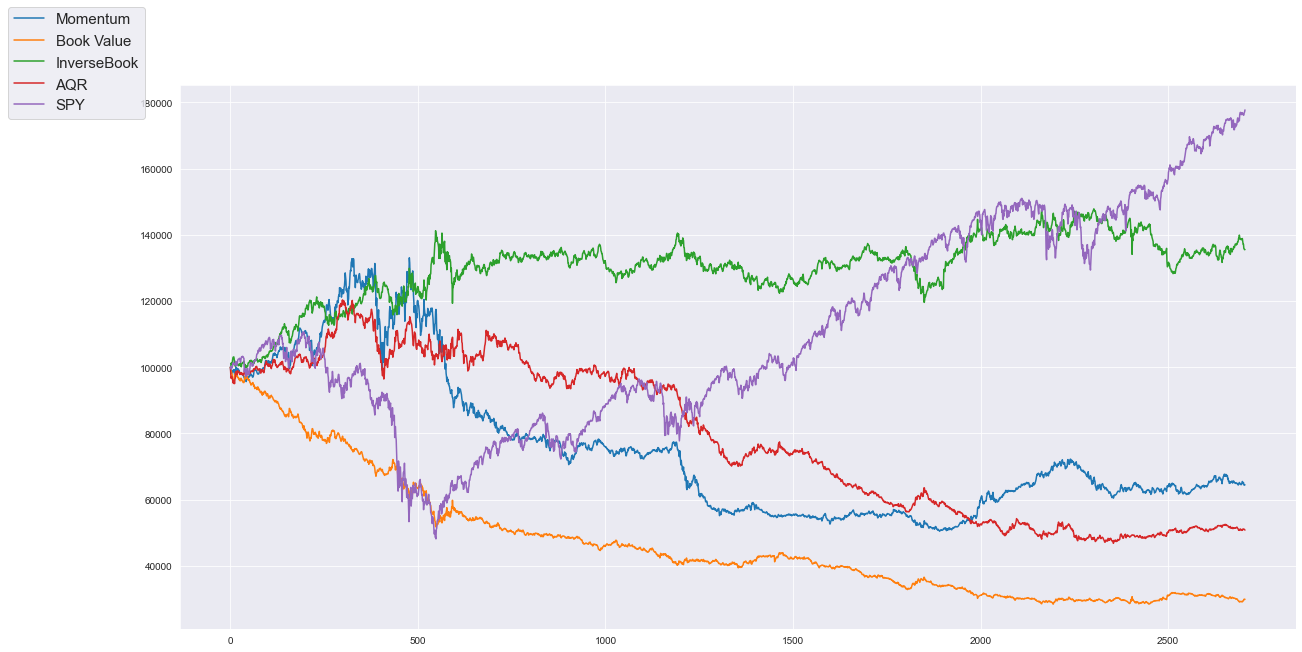

In [9]:
sns.set_style("darkgrid")
plot = plt.figure(figsize=(20,10)) 
plt.plot(returns.iloc[:,1], label="Momentum",)
plt.plot(returns.iloc[:,2], label="Book Value",)
plt.plot(returns.iloc[:,3], label="InverseBook",)
plt.plot(returns.iloc[:,4], label="AQR",)
plt.plot(returns.iloc[:,5], label="SPY",)
plot.legend(loc=2, prop={'size': 15})
plt.show()